In [1]:
import csv
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.feature_extraction import _stop_words
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import keras
import seaborn as sns
sns.set(color_codes=True)

In [2]:
URL_tr = "https://raw.githubusercontent.com/cacoderquan/Sentiment-Analysis-on-the-Rotten-Tomatoes-movie-review-dataset/master/train.tsv";

In [3]:
data = pd.read_csv(URL_tr, sep='\t')

In [4]:
data

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


In [5]:
fullSent = data.loc[data.groupby('SentenceId')['PhraseId'].idxmin()]
fullSent.head(25)

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
63,64,2,"This quiet , introspective and entertaining in...",4
81,82,3,"Even fans of Ismail Merchant 's work , I suspe...",1
116,117,4,A positively thrilling combination of ethnogra...,3
156,157,5,Aggressive self-glorification and a manipulati...,1
166,167,6,A comedy-drama of nearly epic proportions root...,4
198,199,7,"Narratively , Trouble Every Day is a plodding ...",1
213,214,8,"The Importance of Being Earnest , so thick wit...",3
247,248,9,But it does n't leave you with much .,1
259,260,10,You could hate it for the same reason .,1


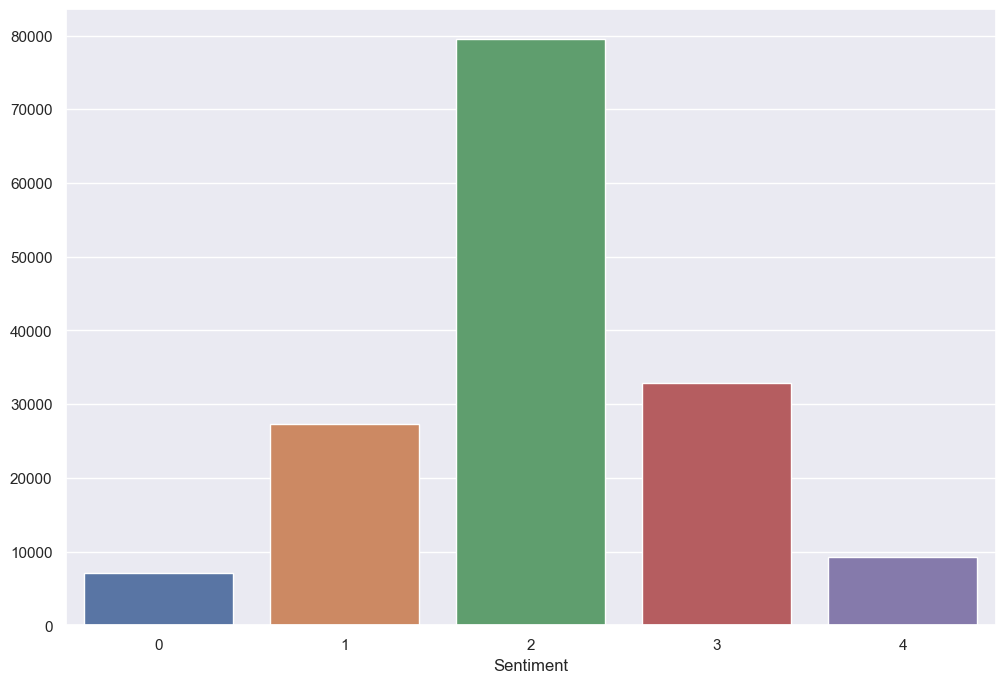

In [6]:
dist = data.groupby(["Sentiment"]).size()
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x=dist.keys(), y=dist.values);

In [7]:
print(len(data.groupby('SentenceId').nunique()))

8529


In [8]:
URL_tr = []

In [9]:
phrase = fullSent['Phrase']
sentiment = fullSent['Sentiment']

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(phrase, sentiment, test_size=0.2, random_state=4)

In [11]:
print("X_train before preprocessing:", X_train)
print("Y_train before preprocessing:", Y_train)

X_train before preprocessing: 103322    Visually exciting sci-fi film which suffers fr...
32029                                          Yes , soar .
103055    It briefly flirts with player masochism , but ...
154689          This pathetic junk is barely an hour long .
40811     Both Grant and Hoult carry the movie because t...
                                ...                        
10746     Sweet Home Alabama is n't going to win any Aca...
113393    The film boasts dry humor and jarring shocks ,...
16507     Even a hardened voyeur would require the patie...
153434    Whether you like it or not is basically a matt...
25081     The rare Imax movie that you 'll wish was long...
Name: Phrase, Length: 6823, dtype: object
Y_train before preprocessing: 103322    2
32029     3
103055    2
154689    0
40811     3
         ..
10746     3
113393    4
16507     0
153434    2
25081     3
Name: Sentiment, Length: 6823, dtype: int64


In [13]:
#Data Cleaning or Preprocessing
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

temp = []

snow = nltk.stem.SnowballStemmer('english')

for sentence in phrase:
    sentence = sentence.lower() #Lowercase Conversion
    cleanr = re.compile("<.*?>")
    sentence = re.sub(cleanr, ' ', sentence) 
    sentence = re.sub(r'[?|!|\'|`|#]', r'', sentence)
    sentence = re.sub(r'[.|,|)|(|\|/]', r' ', sentence) 
    
    words = [snow.stem(word) for word in sentence.split() if word not in stopwords.words('english')] #Removing Punctuations
    temp.append(words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nensi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
phrase=temp
phrase

[['seri',
  'escapad',
  'demonstr',
  'adag',
  'good',
  'goos',
  'also',
  'good',
  'gander',
  'occasion',
  'amus',
  'none',
  'amount',
  'much',
  'stori'],
 ['quiet', 'introspect', 'entertain', 'independ', 'worth', 'seek'],
 ['even',
  'fan',
  'ismail',
  'merchant',
  'work',
  'suspect',
  'would',
  'hard',
  'time',
  'sit',
  'one'],
 ['posit',
  'thrill',
  'combin',
  'ethnographi',
  'intrigu',
  'betray',
  'deceit',
  'murder',
  'shakespearean',
  'tragedi',
  'juici',
  'soap',
  'opera'],
 ['aggress', 'self-glorif', 'manipul', 'whitewash'],
 ['comedy-drama',
  'near',
  'epic',
  'proport',
  'root',
  'sincer',
  'perform',
  'titl',
  'charact',
  'undergo',
  'midlif',
  'crisi'],
 ['narrat', 'troubl', 'everi', 'day', 'plod', 'mess'],
 ['import',
  'earnest',
  'thick',
  'wit',
  'play',
  'like',
  'read',
  'bartlett',
  'familiar',
  'quotat'],
 ['nt', 'leav', 'much'],
 ['could', 'hate', 'reason'],
 ['littl',
  'recommend',
  'snow',
  'dog',
  'unless',

In [18]:
sent = []
for row in phrase:
    sequ = ''
    for word in row:
        sequ = sequ + ' ' +word
    sent.append(sequ)
    
phrase = sent
print(phrase[1])

 quiet introspect entertain independ worth seek


In [19]:
print(phrase[0], sentiment[0])

 seri escapad demonstr adag good goos also good gander occasion amus none amount much stori 1


In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(phrase, sentiment, test_size=0.2, random_state=4)

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer 
tfidf_vectorizer1 = TfidfVectorizer(min_df=5,
                                  max_df = 0.9,
                                  analyzer='word',
                                  strip_accents= 'unicode',
                                  ngram_range=(1,3),
                                  sublinear_tf=True,
                                  smooth_idf=True,
                                  use_idf=True,
                                  stop_words=None)

tfidf_vectorizer1.fit(list(fullSent['Phrase']))

train_tfidf = tfidf_vectorizer1.transform(X_train)
test_tfidf = tfidf_vectorizer1.transform(X_test)
print(train_tfidf.shape)
print(test_tfidf.shape)

(6823, 6856)
(1706, 6856)


In [28]:
rX_train = train_tfidf.toarray()
X_train = rX_train.reshape(rX_train.shape[0], rX_train.shape[1],1)
print(X_train.shape)

rX_test = test_tfidf.toarray()
X_test = rX_test.reshape(rX_test.shape[0], rX_test.shape[1],1)
print(X_test.shape)

Y_train = keras.utils.to_categorical(Y_train)
Y_test = keras.utils.to_categorical(Y_test)
print(Y_train.shape, Y_test.shape)

(6823, 6856, 1)
(1706, 6856, 1)
(6823, 5) (1706, 5)


In [29]:
#Evaluation Metrics
import tensorflow.keras.backend as K # Import tensorflow.keras.backend instead of keras.backend

def recall_m(y_true,y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0,1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0,1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0,1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0,1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true,y_pred):
    precision = precision_m(y_true,y_pred)
    recall = recall_m(y_true,y_pred)
    return 2*((precision * recall)/(precision + recall + K.epsilon()))

In [39]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization, MaxPool1D
from keras.layers import Activation, GlobalMaxPooling1D
from keras import optimizers
from tensorflow.keras.layers import Embedding
from numpy import newaxis

In [43]:
def baseline_cnn_model(fea_matrix, n_class, mode, compiler):
    model = Sequential()
    model.add(Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=(fea_matrix.shape[1],1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Activation('relu'))
    model.add(Dense(n_class, activation='softmax'))

    model.compile(loss = 'categorical_crossentropy', optimizer = compiler, metrics = ['accuracy', f1_m, precision_m, recall_m])
    return model

In [44]:
import math

lr = 0.01
batch_size = 64
num_epochs = 2
decay = math.exp(-4)
mode = "reg"
n_class = 5

adm = optimizers.Adam(learning_rate=lr, decay=decay)
sgd = optimizers.SGD(learning_rate=lr, nesterov=True, momentum=0.7, decay=decay)

model = baseline_cnn_model(X_train, n_class, mode, adm)

In [46]:
history = model.fit(rX_train, Y_train, batch_size=batch_size, epochs=num_epochs, verbose=1, validation_split=0.2)

Epoch 1/2
86/86 ━━━━━━━━━━━━━━━━━━━━ 33s 375ms/step - accuracy: 0.2797 - f1_m: 0.0283 - loss: 2.0391 - precision_m: 0.0937 - recall_m: 0.0245 - val_accuracy: 0.3201 - val_f1_m: 0.0042 - val_loss: 1.5162 - val_precision_m: 0.0909 - val_recall_m: 0.0021
Epoch 2/2
86/86 ━━━━━━━━━━━━━━━━━━━━ 33s 386ms/step - accuracy: 0.4647 - f1_m: 0.2616 - loss: 1.2910 - precision_m: 0.5399 - recall_m: 0.1896 - val_accuracy: 0.3297 - val_f1_m: 0.1744 - val_loss: 1.5839 - val_precision_m: 0.3730 - val_recall_m: 0.1144


In [48]:
preds = model.predict(X_test, verbose=0)

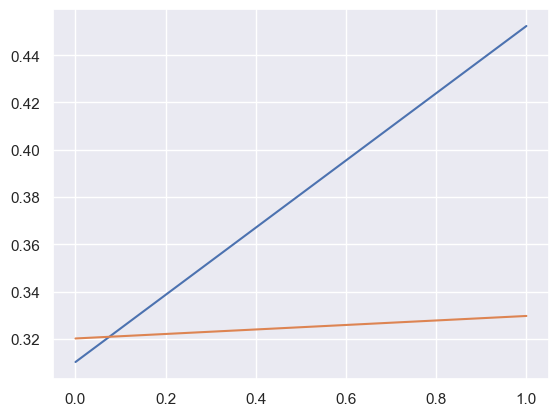

In [50]:
#Plotting Graphs
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

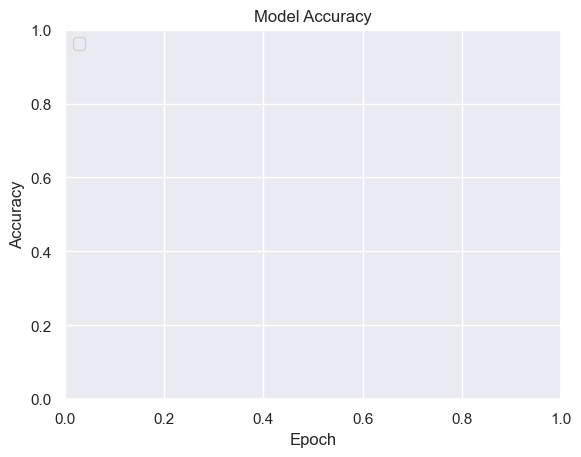

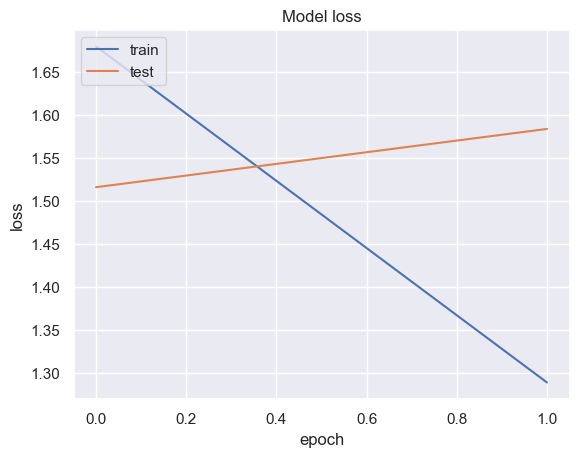

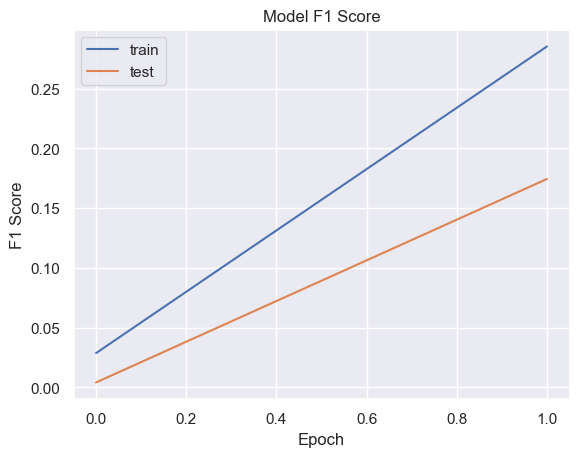

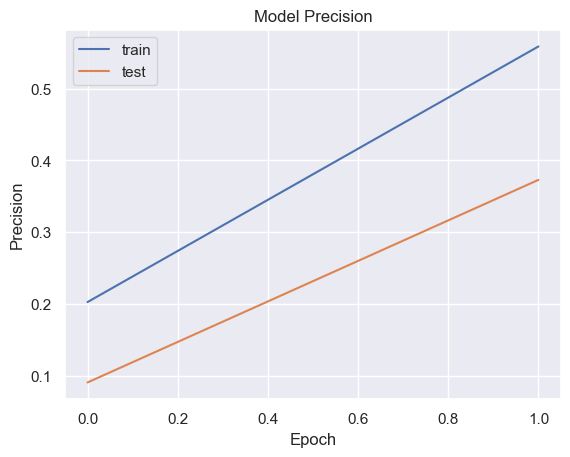

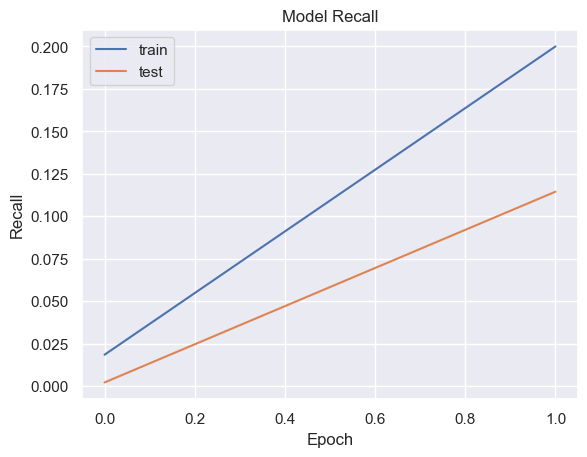

In [51]:
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

plt.plot(history.history['f1_m'])
plt.plot(history.history['val_f1_m'])

plt.title('Model F1 Score')
plt.ylabel('F1 Score')
plt.xlabel('Epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

plt.plot(history.history['precision_m'])
plt.plot(history.history['val_precision_m'])

plt.title('Model Precision')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

plt.plot(history.history['recall_m'])
plt.plot(history.history['val_recall_m'])

plt.title('Model Recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()